In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import json
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 88


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
jieba.load_userdict("add_dict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MD800\AppData\Local\Temp\jieba.cache
Loading model cost 0.582 seconds.
Prefix dict has been built succesfully.


In [6]:
stopWords=[]
with open('stop_dict.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [7]:
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopWords)

In [8]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
    print(l_d)

[('迪士尼樂園', 10), ('纜車', 10), ('昂坪360', 9), ('電影', 8), ('張保仔號', 7), ('海洋公園', 6), ('大嶼山', 6), ('太平山頂纜車', 5), ('夜遊', 5), ('維多利亞港', 5), ('電子', 4), ('杜莎夫人蠟像館', 4), ('維港', 4), ('燈光秀', 4), ('蘭桂坊', 4), ('凌霄閣', 3), ('幻彩詠香江', 3), ('星光大道', 3), ('樂園', 3), ('廟街夜市', 3), ('市集', 3), ('波鞋街', 3), ('天壇大佛', 3), ('街', 3), ('電梯', 3), ('石板街', 3), ('砵典乍街', 3), ('嘉咸街壁畫', 3), ('天際100', 3), ('香港旅遊發展局', 2), ('大補', 2), ('帖', 2), ('元有', 2), ('項超', 2), ('夯', 2), ('大公', 2), ('餐廳', 2), ('帆船', 2), ('原檔', 2), ('經典', 2), ('左右', 2), ('夜景', 2), ('太平山', 2), ('阿甘蝦餐廳', 2), ('緻', 2), ('排', 2), ('天荒地老', 2), ('票', 2), ('太平山夜景', 2), ('快速通道', 2), ('音樂', 2), ('燈', 2), ('觀賞', 2), ('知', 2), ('後', 2), ('亞洲', 2), ('迪士尼', 2), ('主題', 2), ('玩具', 2), ('適合', 2), ('更是', 2), ('男人街', 2), ('文化', 2), ('取景', 2), ('殺', 2), ('畫面', 2), ('周星馳', 2), ('旺角女人街', 2), ('女人街', 2), ('金魚街', 2), ('必', 2), ('全攻略', 2), ('昂坪市集', 2), ('昂坪', 2), ('水晶車', 2), ('山巒', 2), ('水晶', 2), ('街道', 2), ('酒吧', 2), ('手扶梯', 2), ('王菲', 2), ('扶手', 2), ('古', 2), ('蹟', 2), ('色戒', 2), (

In [9]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
#corpus_cut

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)
檢查字典
利用coshow

In [11]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

In [12]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [13]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [14]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\MD800\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,生命,最後血,州,還不忘快,再次,紅色,壽司,如出,呼喊,玩幾天,...,旗艦店,某天,劏,蒐集,名車,那種,美妙,晶荷軒,餐費,特種
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [50]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
#np.savetxt('new.csv', df_tfidf, delimiter = ',' ) 
df_tfidf.to_csv('C:/Users/MD800/Desktop/Result.csv',columns=wfm.columns)
#np.savetxt('head.csv' , wfm.columns , delimiter = ',')
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,生命,最後血,州,還不忘快,再次,紅色,壽司,如出,呼喊,玩幾天,...,旗艦店,某天,劏,蒐集,名車,那種,美妙,晶荷軒,餐費,特種
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.044303,0.000000,0.000000,0.000000,0.0,0.044303
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.028964,0.000000,0.020591,0.028964,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.058705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.04874,0.0,0.000000,0.000000,0.028261,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [20]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items()) # 檢視一下轉換結果

[('生命', 0.0),
 ('最後血', 0.0),
 ('州', 0.0),
 ('還不忘快', 0.0),
 ('再次', 0.0),
 ('紅色', 0.0),
 ('壽司', 0.0),
 ('如出', 0.0),
 ('呼喊', 0.0),
 ('玩幾天', 0.0),
 ('依', 0.0),
 ('做到', 0.0),
 ('很浪費', 0.0),
 ('澳大橋', 0.0),
 ('深得', 0.0),
 ('人間', 0.0),
 ('增添', 0.0),
 ('全消', 0.0),
 ('潮流', 0.0),
 ('不了', 0.0),
 ('繳不適', 0.0),
 ('觀塘巧', 0.0),
 ('四人桌', 0.0),
 ('一支', 0.0),
 ('拿到', 0.0),
 ('比亮', 0.0),
 ('領取', 0.0),
 ('即止', 0.0),
 ('剩魚', 0.0),
 ('區另', 0.0),
 ('帶給', 0.0),
 ('很紅', 0.0),
 ('半價起', 0.0),
 ('威靈頓', 0.0),
 ('不准', 0.0),
 ('負責', 0.0),
 ('蛋黃蓮蓉酥', 0.0),
 ('文字', 0.0),
 ('這就', 0.0),
 ('印尼', 0.0),
 ('HK51', 0.0),
 ('時二種', 0.0),
 ('老一輩', 0.0),
 ('霸子', 0.0),
 ('南山', 0.0),
 ('氣去', 0.0),
 ('爆多人', 0.0),
 ('程記', 0.0),
 ('Kiwi', 0.0),
 ('還沒到', 0.0),
 ('鬼節', 0.0),
 ('海旁', 0.0),
 ('號香', 0.0),
 ('七喜', 0.0),
 ('丹麥', 0.0),
 ('作品', 0.0),
 ('各色', 0.0),
 ('冬季', 0.0),
 ('身體', 0.0),
 ('遊覽維多莉亞港', 0.0),
 ('邊看', 0.0),
 ('謝斐道', 0.0),
 ('證後瞄', 0.0),
 ('糖', 0.0),
 ('六十多年', 0.0),
 ('Modern', 0.0),
 ('ID', 0.0),
 ('差', 0.0),
 ('超出', 0.0),
 ('

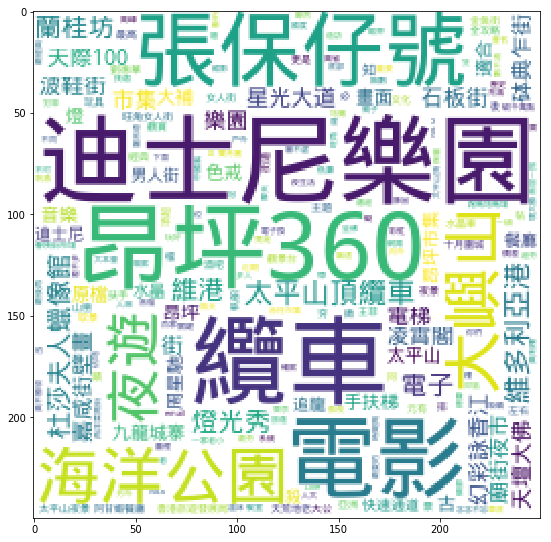

In [21]:
#linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
linux_font = r'/Users/MD800/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=250, width=250)


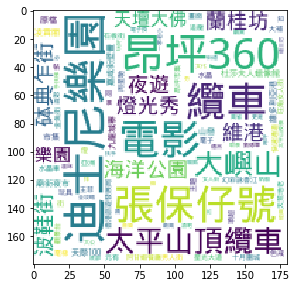

In [22]:
#修正過後
plt.figure(figsize=(10, 10))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=180, width=180)

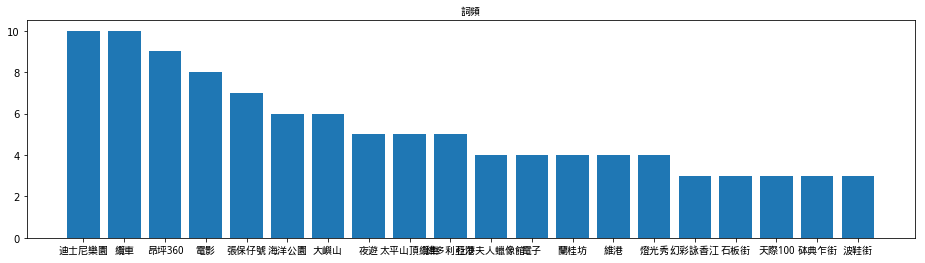

In [23]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

In [ ]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")